In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
%matplotlib inline

In [13]:
# Read in data and set nan's to zero
starlink_data = np.load("starlink_data.npy")
starlink_data = np.nan_to_num(starlink_data, nan = 0)
print(starlink_data.shape)

(1984, 8018, 10)


In [44]:
sat_ind = np.arange(0,starlink_data.shape[0])
time_ind = 1

time = starlink_data[sat_ind, ::time_ind, 0]
time = (time - 2022*10**9) *10**-6
time = time - time[:,0:1]

angular_momentum_x = starlink_data[sat_ind, ::time_ind, 7]
angular_momentum_y = starlink_data[sat_ind, ::time_ind, 8]
angular_momentum_z = starlink_data[sat_ind, ::time_ind, 9]

position = starlink_data[ :, ::time_ind,1:4]
radius = np.linalg.norm(position,axis =2)



In [146]:
def plot_time_clusters(num_clusters, data,time,clusters,ax,sat_ind):
    '''
    plots each cluster separately with its mean for a given 
    '''
    for i in range(0,num_clusters):
        title = "Cluster" + str(i)
        # calculates the mean position and time between each satellite
        # radius_mean = np.nanmean(data[clusters==i,:],axis =0)
        # time_mean = np.nanmean(time[clusters==i,:],axis =0)
        # scatter plots each satellites value as a function of time
        if i ==3:
            ax[i].scatter(time[514, :],data[514, :],color = "blue",s =1)
            # ax[i].set_xlim([0,2])
        else:
            ax[i].scatter(time[sat_ind,:][clusters==i, :][0,:],data[sat_ind,:][clusters==i, :][0,:],color = "blue",s =1)
        # ax[i].plot(time_mean,radius_mean,color = "red")
        ax[i].set_title(title)
        ax[i].set_ylim([np.nanmin(radius)-50, np.nanmax(radius)+50])
        ax[i].draw
    plt.tight_layout()

In [95]:
def create_labels(amount_labels,labels,radius,time):
    '''
    Cluster 0: Constant
    Cluster 1: Always increasing 
    Cluster 2: Always deacreasing
    Cluster 3: Dies at some point in the month 
    Cluster 4: constat to decrease
    Cluster 5: increase to constant
    '''
    plt.scatter(time,radius)
    plt.ylim([np.nanmin(radius)-50, np.nanmax(radius)+50])
    plt.draw
    plt.pause(0.1)
    labels = int(input('Give a Cluster Number:'))
    # plt.clf()
    clear_output(wait=True)

    return labels

In [110]:
'''
Cluster 0: Constant
Cluster 1: Always increasing 
Cluster 2: Always deacreasing
Cluster 3: Dies at some point in the month 
Cluster 4: constat to decrease
Cluster 5: increase to constant
Cluster 6: constant to increase
Cluster 7: decrease to constant
'''
amount_labels = 150
np.random.seed(2)
sat_ind = np.random.choice(starlink_data.shape[0],amount_labels)
labels =np.zeros(sat_ind.shape)
    



Text(17.5, 0.5, 'Radius in Km')

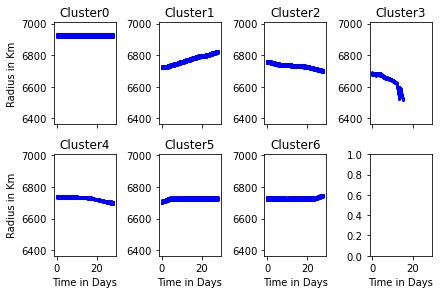

In [151]:
fig,ax =plt.subplots(nrows = 2,ncols=4,sharex=True)
ax = ax.ravel()
plot_time_clusters(7, radius,time,labels.T,ax,sat_ind)
ax[4].set_xlabel('Time in Days')
ax[5].set_xlabel('Time in Days')
ax[6].set_xlabel('Time in Days')
ax[7].set_xlabel('Time in Days')
ax[0].set_ylabel('Radius in Km')
ax[4].set_ylabel('Radius in Km')

In [113]:
out = np.vstack([sat_ind,labels]).T
np.savetxt('labels.txt',out,fmt = '%d')

In [102]:
test = np.loadtxt('labels.txt',dtype = int)
print(test.shape)

(150, 2)
